In [1]:
import pandas as pd
database = pd.read_excel('database_TCC.xlsx')
database = database[['A','E','N','Tmax']]
database

,A,E,N,Tmax
0,25,1,11,67.67
1,25,1,5,126.85
2,25,2,8,72.71
3,25,3,11,162.85
4,25,3,5,94.85
5,35,1,8,61.15
6,35,2,11,63.03
7,35,2,5,77.35
8,35,3,8,63.25
9,25,1,8,76.30


In [2]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(database)
data = standardscaler.transform(database)
database = pd.DataFrame(data,columns=database.columns)

In [7]:
import pickle
pickle.dump(standardscaler, open('standard_scaler_Tmax.pkl','wb'))

In [3]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror


# Random Forest Regressor

In [9]:
dataset_x,dataset_y = split_x_and_y(database,['A','E','N'],'Tmax')

In [10]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=1000)
RFR.fit(dataset_x,dataset_y)
RFR.score(dataset_x,dataset_y)

0.8447830391182938

In [11]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=3000,criterion='absolute_error',random_state=100)
RFR.fit(dataset_x,dataset_y)
RFR.score(test_x,test_y)

0.7053810307734065

In [5]:
RFR.feature_importances_

array([0.21169354, 0.38198803, 0.40631843])

In [12]:
import pickle
pickle.dump(RFR, open('Random_Forest_Regressor_Tmax.pkl', 'wb'))

# SVM

In [125]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn import svm
from sklearn.model_selection import GridSearchCV

svr = svm.SVR(C=4,kernel ='rbf',gamma='scale')

svr.fit(dataset_x,dataset_y)
svr.score(test_x,test_y)

0.6006148480401164

# MLP

In [17]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=1000,hidden_layer_sizes=(64,32),activation='relu',solver='adam',learning_rate='constant',momentum=0.9,beta_1=0.6,beta_2=0.959,random_state = 100)
MLP.fit(dataset_x,dataset_y)
MLP.score(test_x,test_y)

0.830254490027388

# Polynomial with Linear

In [16]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(4)
LR = LinearRegression()

dataset_x_transformed = poly.fit_transform(dataset_x)
test_x_transformed = poly.fit_transform(test_x)

LR.fit(dataset_x_transformed,dataset_y)
LR.score(test_x_transformed,test_y)

0.2550390584768786

# Keras

In [81]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

model = keras.Sequential([
  layers.Dense(500, activation='sigmoid', input_shape=[len(variables.keys())]),
  # layers.Dropout(0.3),
  layers.Dense(500, activation='sigmoid'),
  layers.Dense(1)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

history = model.fit(variables.values,results.values,epochs=450,validation_split=0.2)

Epoch 1/450
1/1 [==============================] - 1s 538ms/step - loss: 1.5233 - mse: 1.5233 - val_loss: 0.9323 - val_mse: 0.9323
Epoch 2/450
1/1 [==============================] - 0s 30ms/step - loss: 4.4057 - mse: 4.4057 - val_loss: 0.1655 - val_mse: 0.1655
Epoch 3/450
1/1 [==============================] - 0s 35ms/step - loss: 1.6880 - mse: 1.6880 - val_loss: 2.5342 - val_mse: 2.5342
Epoch 4/450
1/1 [==============================] - 0s 34ms/step - loss: 2.1432 - mse: 2.1432 - val_loss: 4.2233 - val_mse: 4.2233
Epoch 5/450
1/1 [==============================] - 0s 38ms/step - loss: 3.1158 - mse: 3.1158 - val_loss: 3.3451 - val_mse: 3.3451
Epoch 6/450
1/1 [==============================] - 0s 32ms/step - loss: 2.5796 - mse: 2.5796 - val_loss: 1.5953 - val_mse: 1.5953
Epoch 7/450
1/1 [==============================] - 0s 41ms/step - loss: 1.6985 - mse: 1.6985 - val_loss: 0.3963 - val_mse: 0.3963
Epoch 8/450
1/1 [==============================] - 0s 33ms/step - loss: 1.5016 - mse: 1.5

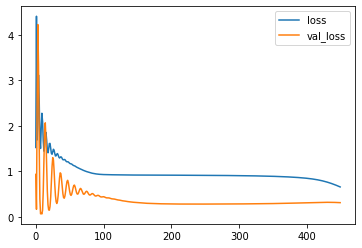

In [82]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [83]:
guess = model.predict(test_x.values)
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = guess
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 95ms/step


array([[ 25.        ,   1.        ,   8.        ,  86.05627629],
       [ 25.        ,   2.        ,   5.        , 102.64300979],
       [ 35.        ,   3.        ,  11.        ,  90.00943901]])

In [84]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = test_y
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 76.3 ],
       [25.  ,  2.  ,  5.  , 98.76],
       [35.  ,  3.  , 11.  , 94.7 ]])

In [85]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.538342781496221 meansquarederror: 44.088018149927734 meanabsoluteerror: 6.109949023421696 maxerror: 9.756276286939823


(0.538342781496221, 44.088018149927734, 6.109949023421696, 9.756276286939823)

In [86]:
# model.save("keras_model_Tmax.h5")

In [65]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

model_3 = keras.Sequential([
  layers.Dense(256*6, activation='sigmoid', input_shape=[len(variables.keys())]),
  # layers.Dropout(0.3),
  layers.Dense(256*6, activation='sigmoid'),
  layers.Dense(1)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model_3.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

history = model_3.fit(variables.values,results.values,epochs=200,validation_split=0.2)

Epoch 1/200
1/1 [==============================] - 1s 609ms/step - loss: 1.7796 - mse: 1.7796 - val_loss: 84.7101 - val_mse: 84.7101
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 72.5178 - mse: 72.5178 - val_loss: 9.5247 - val_mse: 9.5247
Epoch 3/200
1/1 [==============================] - 0s 51ms/step - loss: 6.8112 - mse: 6.8112 - val_loss: 11.6942 - val_mse: 11.6942
Epoch 4/200
1/1 [==============================] - 0s 59ms/step - loss: 18.9289 - mse: 18.9289 - val_loss: 29.0536 - val_mse: 29.0536
Epoch 5/200
1/1 [==============================] - 0s 53ms/step - loss: 39.2178 - mse: 39.2178 - val_loss: 16.7429 - val_mse: 16.7429
Epoch 6/200
1/1 [==============================] - 0s 50ms/step - loss: 24.9354 - mse: 24.9354 - val_loss: 1.7847 - val_mse: 1.7847
Epoch 7/200
1/1 [==============================] - 0s 53ms/step - loss: 5.8051 - mse: 5.8051 - val_loss: 2.9086 - val_mse: 2.9086
Epoch 8/200
1/1 [==============================] - 0s 52ms/step - loss: 2

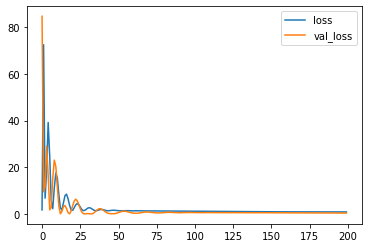

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [67]:
guess = model_3.predict(test_x.values)
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = guess
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 63ms/step


array([[ 25.        ,   1.        ,   8.        ,  87.17506107],
       [ 25.        ,   2.        ,   5.        , 105.09643434],
       [ 35.        ,   3.        ,  11.        ,  89.04568933]])

In [68]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = test_y
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 76.3 ],
       [25.  ,  2.  ,  5.  , 98.76],
       [35.  ,  3.  , 11.  , 94.7 ]])

In [64]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: -0.026491111216835783 meansquarederror: 98.02935365928191 meanabsoluteerror: 9.432419907068384 maxerror: 13.270279642854874


(-0.026491111216835783,
 98.02935365928191,
 9.432419907068384,
 13.270279642854874)

In [34]:
# model_3.save("keras_model_Tmax.h5")

# KERAS BOXPLOT

In [100]:
predictions_tmax = []


for i in range(0,25):
    variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')
    test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

    model_3 = keras.Sequential([
    layers.Dense(256*6, activation='sigmoid', input_shape=[len(variables.keys())]),
    # layers.Dropout(0.3),
    layers.Dense(256*6, activation='sigmoid'),
    layers.Dense(1)
    ])

    # optimizer = tf.keras.optimizers.RMSprop(0.001)

    model_3.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

    history = model_3.fit(variables.values,results.values,epochs=200,validation_split=0.2)

    guess = model_3.predict(test_x.values)
    desnormalizar = test_x.copy()
    desnormalizar['Tmax'] = guess
    desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)

    desnormalizar = test_x.copy()
    desnormalizar['Tmax'] = test_y
    desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)

    r2,meansquarederror,meanabsoluteerror,maxerror = scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

    predictions_tmax.append(list(desnormalizado_teste[:,3]))

Epoch 1/200
1/1 [==============================] - 0s 457ms/step - loss: 1.6287 - mse: 1.6287 - val_loss: 68.5260 - val_mse: 68.5260
Epoch 2/200
1/1 [==============================] - 0s 36ms/step - loss: 83.4642 - mse: 83.4642 - val_loss: 2.8139 - val_mse: 2.8139
Epoch 3/200
1/1 [==============================] - 0s 43ms/step - loss: 7.4235 - mse: 7.4235 - val_loss: 28.0078 - val_mse: 28.0078
Epoch 4/200
1/1 [==============================] - 0s 46ms/step - loss: 21.8509 - mse: 21.8509 - val_loss: 54.9585 - val_mse: 54.9585
Epoch 5/200
1/1 [==============================] - 0s 46ms/step - loss: 45.4450 - mse: 45.4450 - val_loss: 36.9612 - val_mse: 36.9612
Epoch 6/200
1/1 [==============================] - 0s 44ms/step - loss: 29.5079 - mse: 29.5079 - val_loss: 10.0760 - val_mse: 10.0760
Epoch 7/200
1/1 [==============================] - 0s 41ms/step - loss: 7.1868 - mse: 7.1868 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 8/200
1/1 [==============================] - 0s 37ms/step - loss:

In [105]:
df_boxplots = pd.DataFrame(predictions_tmax,columns=['C1','C2','C3'])

<AxesSubplot:ylabel='C1'>

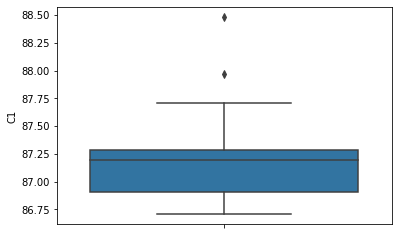

In [106]:
import seaborn as sns
sns.boxplot(data=df_boxplots,y='C1')

<AxesSubplot:ylabel='C2'>

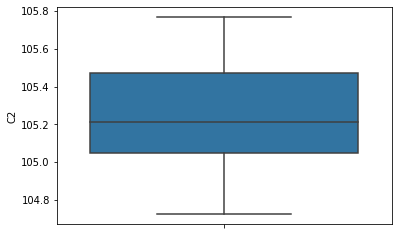

In [107]:
import seaborn as sns
sns.boxplot(data=df_boxplots,y='C2')

<AxesSubplot:ylabel='C3'>

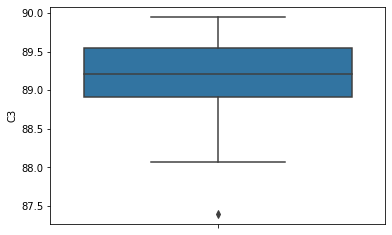

In [108]:
import seaborn as sns
sns.boxplot(data=df_boxplots,y='C3')

<AxesSubplot:>

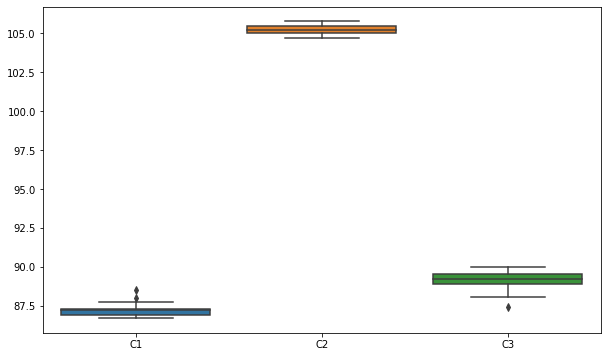

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_boxplots)
